# <center> <span style='color:Blue'>---LAB-3: noise spectrum density---</span> <center>

<span style='color:Magenta'>I-Import libraries and audios noises</span>
=======

In [39]:
%matplotlib inline
import librosa
from IPython.display import Audio
import scipy
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import librosa.display
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

In [40]:
file_path = ["../data/audios/noise1.wav", "../data/audios/noise2.wav", "../data/audios/noise3.wav"] 
samples = []
sampling_rate = [] 

for i in range(3):
    samples_temp , sampling_rate_temp = librosa.load(file_path[i], sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
    samples.append(samples_temp)
    sampling_rate.append(sampling_rate_temp)
for i in range(3):
    print("Audio",i,[len(samples[i]),sampling_rate[i]])

Audio 0 [140001, 16000]
Audio 1 [140001, 16000]
Audio 2 [140001, 16000]


In [41]:
duration_of_sound = [ len(samples[i])/sampling_rate[i] for i in range(3) ]
duration_of_sound

[8.7500625, 8.7500625, 8.7500625]

In [42]:
print("Noise 1")
Audio(file_path[0])

Noise 1


In [43]:
print("Noise 2")
Audio(file_path[1])

Noise 2


In [44]:
print("Noise 3")
Audio(file_path[2])

Noise 3


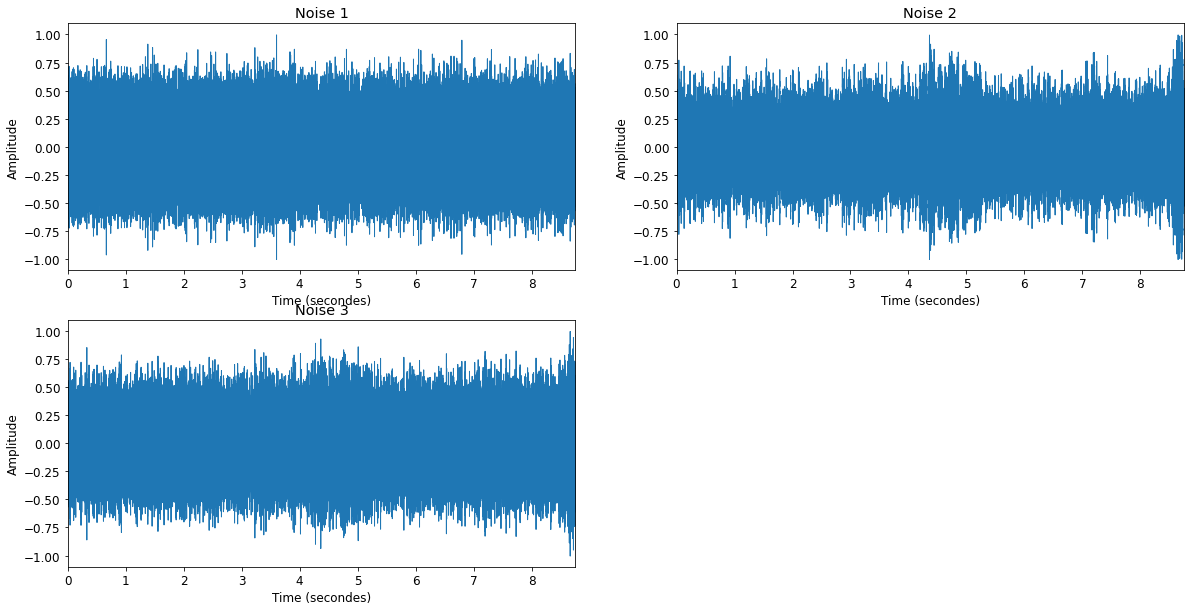

In [45]:
for i in range(3):
    plt.subplot(2, 2, i+1)
    
    librosa.display.waveplot(y = samples[i], sr = sampling_rate[i]) 
    plt.xlabel("Time (secondes)")
    plt.ylabel("Amplitude")
    plt.title("Noise %i" %(i+1)) 
plt.show()

<span style='color:Magenta'>I-Spectral density estimation</span>
=======

The goal of spectral density estimation (SDE) is to estimate the spectral density (also known as the power spectral density) of a random signal from a sequence of time samples of the signal. The spectral density characterizes the frequency content of the signal. One purpose of estimating the spectral density is to detect any periodicities in the data, by observing peaks at the frequencies corresponding to these periodicities. 

## Power Spectral Densitity

For a wide-sense stationary (WSS) real-valued random process $x[k]$, the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given as the discrete-time Fourier transformation (DTFT) of the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa}
\end{equation}

Under the assumption of a real-valued LTI system with impulse response $h[k] \in \mathbb{R}$, the PSD $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ is derived by taking the DTFT of the ACF of the output signal $\varphi_{yy}[\kappa]$

\begin{align}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) &= \sum_{\kappa = -\infty}^{\infty} \underbrace{h[\kappa] * h[-\kappa]}_{\varphi_{hh}[\kappa]} * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} \\ 
&= H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = | H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{align}

The PSD of the output signal $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of an LTI system is given by the  PSD of the input signal $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ multiplied with the squared magnitude $| H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2$ of the transfer function of the system.

## Cross-Power Spectral Densities

The cross-power spectral densities $\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between the in- and output of an LTI system are given by taking the DTFT of the cross-correlation functions(CCF) $\varphi_{yx}[\kappa]$ and $\varphi_{xy}[\kappa]$. Hence,

\begin{equation}
\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

and

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[-\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega})
\end{equation}

### Problem Statement

The estimation of the spectral properties of a random signal is of special interest for spectral analysis. The discrete Fourier transform (DFT) of a random signal is also random. It is not very well suited to gain insights into the average spectral structure of a random signal. We aim at estimating the PSD $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a wide-sense stationary (WSS) and ergodic process from a limited number of samples. This is known as [*spectral (density) estimation*](https://en.wikipedia.org/wiki/Spectral_density_estimation). Many techniques have been developed for this purpose. They can be classified into two techniques:

1. non-parametric 
2. parametric

Non-parametric techniques estimate the PSD of the random signal without assuming any particular structure for the generating random process. In contrary, parametric techniques assume that the generating random process can be modeled by a few parameters. Their aim is to estimate these parameters in order to characterize the spectral properties of the random signal.

<span style='color:Red'>1-Estimate the spectrum density by periodogram</span>
=======

The [periodogram](https://en.wikipedia.org/wiki/Spectral_density_estimation#Periodogram) is an estimator for the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$. For the following it is assumed that $x[k]$ is drawn from a wide-sense ergodic real-valued random process.

### Definition

The PSD is defined as the discrete-time Fourier transformation (DTFT) of the auto-correlation function (ACF)

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \}
\end{equation}

Hence, the PSD can be computed from an estimate of the ACF. Let's assume that we want to estimate the PSD from $N$ samples of the random signal $x[k]$ by way of the ACF. The signal $x[k]$ is truncated to $N$ samples by multiplication (windowing) with the rectangular signal $\text{rect}_N[k]$ of length $N$

\begin{equation}
x_N[k] = x[k] \cdot \text{rect}_N[k]
\end{equation}

where $x_N[k]$ denotes the truncated signal.
The ACF is estimated by applying its definition in a straightforward manner. For a random signal $x_N[k]$ of finite length, the estimated ACF $\hat{\varphi}_{xx}[\kappa]$ can be expressed in terms of a convolution

\begin{equation}
\hat{\varphi}_{xx}[\kappa] = \frac{1}{N} \cdot x_N[k] * x_N[-k]
\end{equation}

Applying the DTFT to both sides and rearranging the terms yields

\begin{equation}
\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, X_N(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) = 
\frac{1}{N} \, | X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

where the intermediate and last equalities result from the symmetry relations of the DTFT. This estimate of the PSD is known as the periodogram. It can be computed directly from the DTFT

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}
\end{equation}

of the truncated random signal.

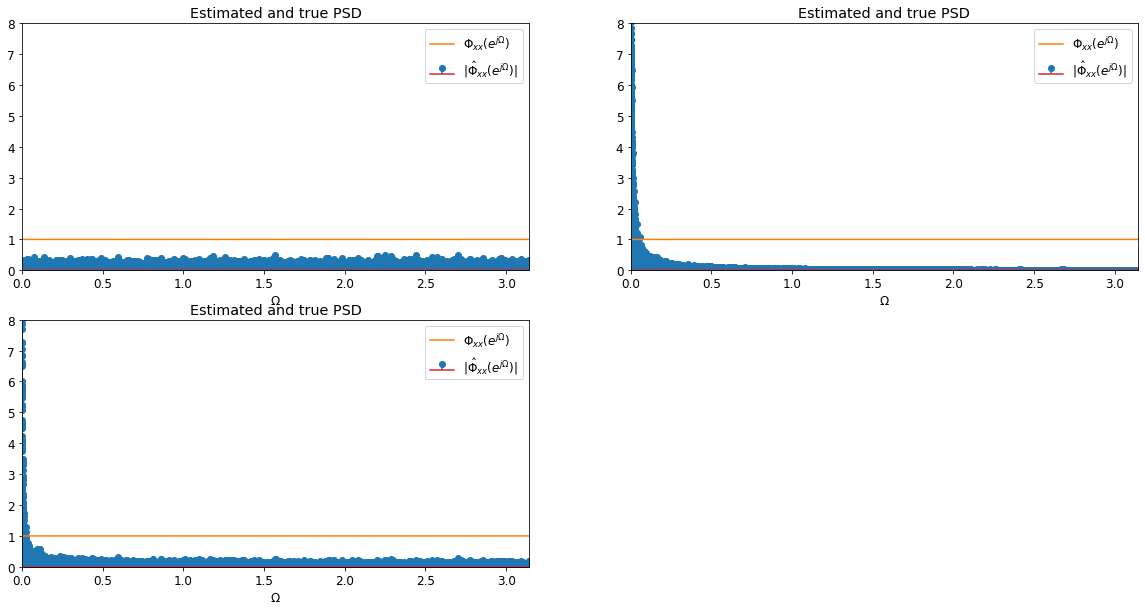

In [46]:
Mean = []
Variance = []
for i in range(3):

    
    x = samples[i]
    N = len(x)
    # compute magnitude of the periodogram
    x = np.concatenate((x, np.zeros_like(x)))
    X = np.fft.rfft(x)
    Om = np.linspace(0, np.pi, len(X))
    Sxx = 1/N * abs(X)**2
    Mean.append(np.mean(np.abs(Sxx)))
    Variance.append(np.var(np.abs(Sxx)))


    # plot results
    plt.subplot(2, 2, i+1)
    plt.stem(Om, Sxx, 'C0', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$', use_line_collection=True)
    plt.plot(Om, np.ones_like(Sxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
    plt.title('Estimated and true PSD')
    plt.xlabel(r'$\Omega$')
    plt.axis([0, np.pi, 0, 8])
    plt.legend()
plt.show()

In [47]:
for i in range(3):
    # compute mean value of the periodogram
    print('Mean value of the periodogram',i+1,': {0:1.3f}'.format(Mean[i]))
    print('Variance of the periodogram',i+1,': {0:1.3f}'.format(Variance[i]))

Mean value of the periodogram 1 : 0.046
Variance of the periodogram 1 : 0.002
Mean value of the periodogram 2 : 0.053
Variance of the periodogram 2 : 2.371
Mean value of the periodogram 3 : 0.046
Variance of the periodogram 3 : 0.448


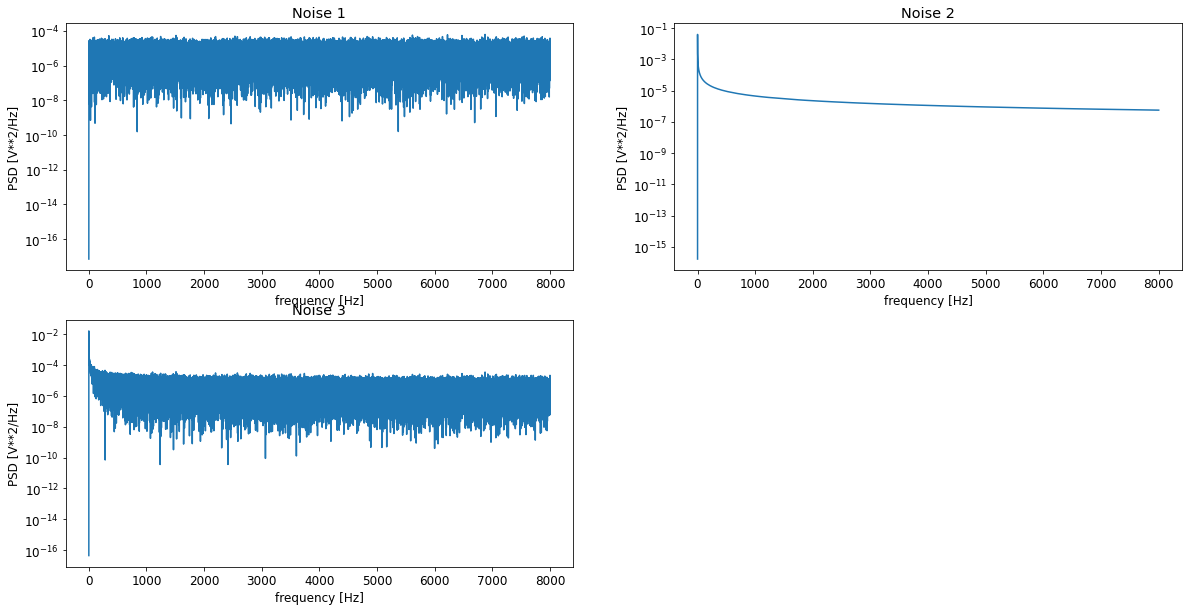

In [48]:
from scipy import signal
for i in range(3):
    f, Pxx_den = signal.periodogram(samples[i], sampling_rate[i])
        
    plt.subplot(2, 2, i+1)

    plt.semilogy(f, Pxx_den)



    plt.xlabel('frequency [Hz]')

    plt.ylabel('PSD [V**2/Hz]')
    plt.title("Noise %i" %(i+1)) 
plt.show()

Now compute and plot the power spectrum.

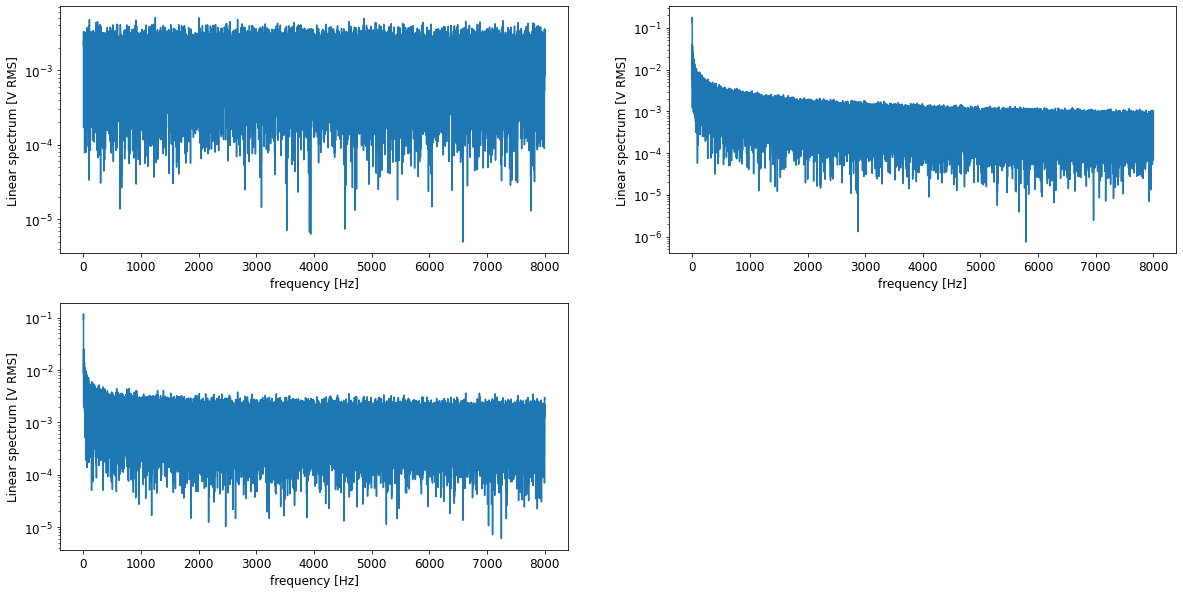

In [49]:
peak = []
for i in range(3):
    f, Pxx_spec = signal.periodogram(samples[i], sampling_rate[i], 'flattop', scaling='spectrum')
    plt.subplot(2, 2, i+1)


    plt.semilogy(f, np.sqrt(Pxx_spec))

    plt.xlabel('frequency [Hz]')

    plt.ylabel('Linear spectrum [V RMS]')
    peak.append(np.sqrt(Pxx_spec.max()))

plt.show()

The peak height in the power spectrum is an estimate of the RMS amplitude.

In [50]:
for i in range(3):
    print('peak noise',i+1,peak[i])

peak noise 1 0.0051304046
peak noise 2 0.17834929
peak noise 3 0.117817335


<span style='color:Red'>2-Estimate the spectrum density by Welch Method</span>
=======

## The Welch Method

In the previous section it has been shown that the [periodogram](periodogram.ipynb) as a non-parametric estimator of the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$ is not consistent. This is due to the fact that its variance does not converge towards zero even when the length of the random signal is increased towards infinity. In order to overcome this problem, the [Bartlett method](https://en.wikipedia.org/wiki/Bartlett's_method) and [Welch method](https://en.wikipedia.org/wiki/Welch's_method) 

1. split the random signal into segments, 
2. estimate the PSD for each segment, and 
3. average over these local estimates. 

The averaging reduces the variance of the estimated PSD. While Barlett's method uses non-overlapping segments, Welch's is a generalization using windowed overlapping segments. For the discussion of Welch's method we assume a wide-sense ergodic real-valued random process.

Compute and plot the power spectral density.

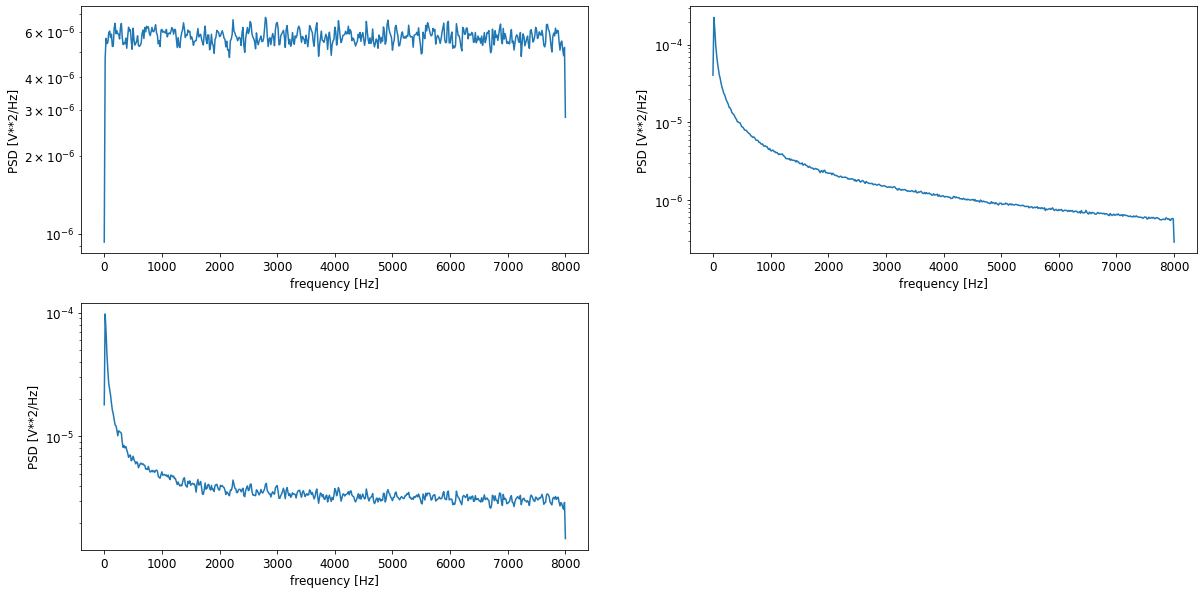

In [51]:
for i in range(3):
    f, Pxx_den = signal.welch(samples[i], sampling_rate[i], nperseg=1024)
    plt.subplot(2, 2, i+1)
    plt.semilogy(f, Pxx_den)


    plt.xlabel('frequency [Hz]')

    plt.ylabel('PSD [V**2/Hz]')

plt.show()

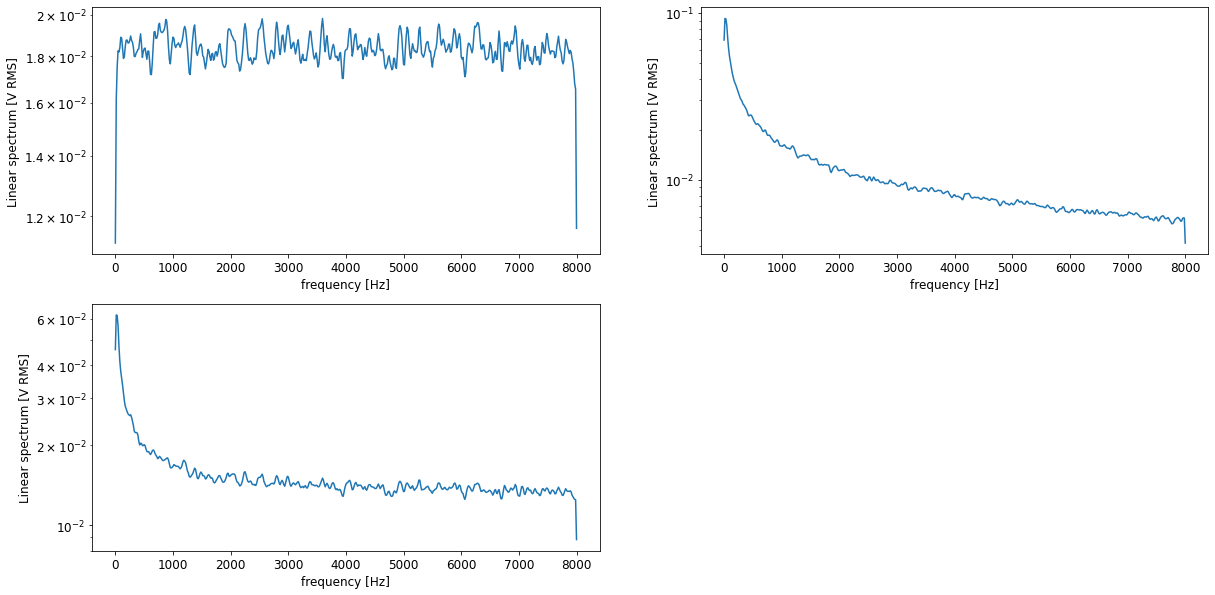

In [52]:
peak = []
for i in range(3):
    f, Pxx_spec = signal.welch(samples[i], sampling_rate[i], 'flattop', 1024, scaling='spectrum')
    plt.subplot(2, 2, i+1)
    
    
    plt.semilogy(f, np.sqrt(Pxx_spec))

    plt.xlabel('frequency [Hz]')

    plt.ylabel('Linear spectrum [V RMS]')
    peak.append(np.sqrt(Pxx_spec.max()))

plt.show()

In [53]:
for i in range(3):
    print(peak[i])

0.019821549
0.09278644
0.061894163


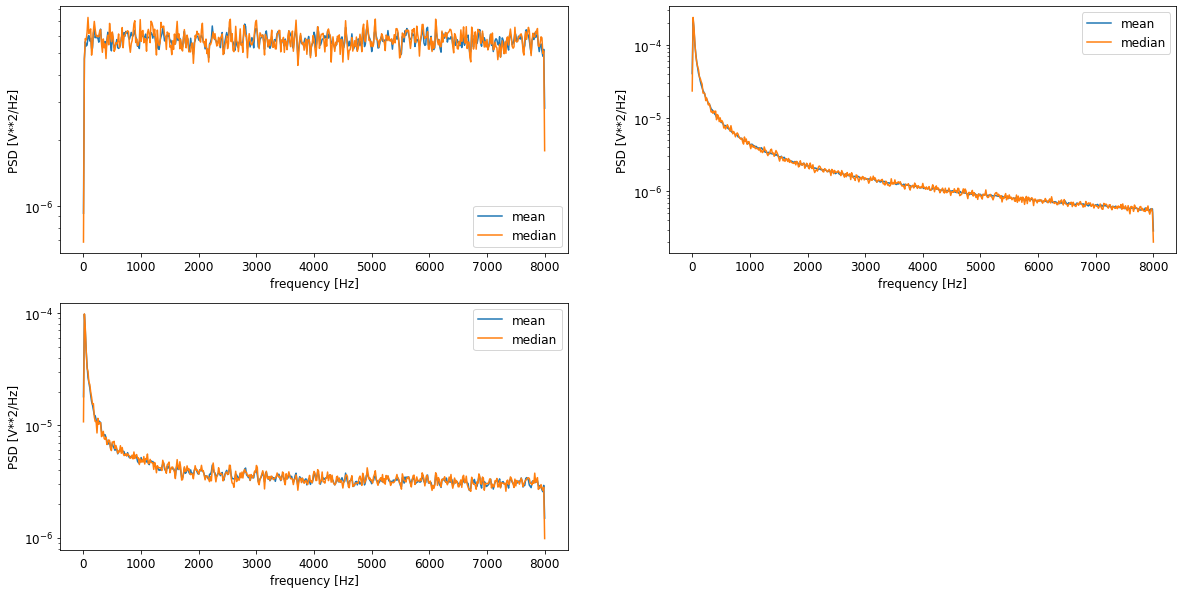

In [54]:
for i in range(3):
    f, Pxx_den = signal.welch(samples[i], sampling_rate[i], nperseg=1024)

    f_med, Pxx_den_med = signal.welch(samples[i], sampling_rate[i], nperseg=1024, average='median')
    plt.subplot(2, 2, i+1)

    plt.semilogy(f, Pxx_den, label='mean')

    plt.semilogy(f_med, Pxx_den_med, label='median')


    plt.xlabel('frequency [Hz]')

    plt.ylabel('PSD [V**2/Hz]')

    plt.legend()

plt.show()


<span style='color:Red'>2-Colors of noise</span>
=======


<img src="../data/images/The_Colors_of_Noise.png" width=500 >

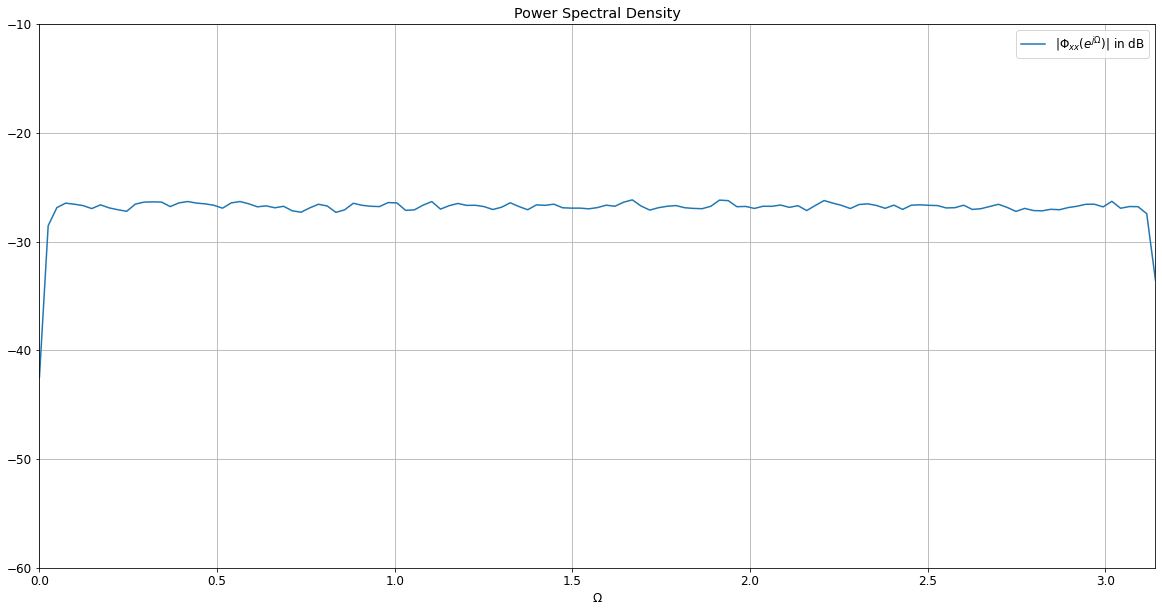

In [55]:

x = samples[0]

# estimate PSDs using Welch's technique
f, Pxx = signal.csd(x, x, nperseg=256)

# PSDs
Om = f * 2 * np.pi
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)),
         label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.title('Power Spectral Density')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, -10])
plt.grid()

In [56]:
print("Noise 1 is a white noise")

Noise 1 is a white noise


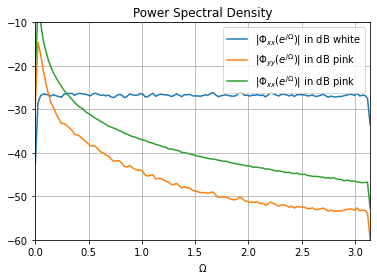

In [57]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline


x = samples[0]
z = samples[1]

# filter white noise to yield pink noise
# see http://www.firstpr.com.au/dsp/pink-noise/#Filtering
a = np.poly([0.99572754, 0.94790649, 0.53567505])  # denominator coefficients
b = np.poly([0.98443604, 0.83392334, 0.07568359])  # numerator coefficients
y = 1/3 * sig.lfilter(b, a, x)
# estimate PSDs using Welch's technique
f, Pxx = sig.csd(x, x, nperseg=256)
f, Pyy = sig.csd(y, y, nperseg=256)
f, P = sig.csd(z, z, nperseg=256)
# PSDs
Om = f * 2 * np.pi
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)),
         label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB white')
plt.plot(Om, 20*np.log10(np.abs(.5*Pyy)),
         label=r'$| \Phi_{yy}(e^{j \Omega}) |$ in dB pink')
plt.plot(Om, 20*np.log10(np.abs(.5*P)),
         label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB pink')
plt.title('Power Spectral Density')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, -10])
plt.grid()

In [58]:
print("Noise 2 is a pink noise")

Noise 2 is a pink noise
